In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
DATA_PATH = '{}/data/json'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
import json
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [10]:
%load_ext autoreload
%autoreload 2
from scripts.text.article_text_processor import ArticleTextProcessor
from scripts.text.teams_players import TeamPlayers
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def plot_wordcloud(words ,width=800, heigh=800):
    wordcloud = WordCloud(width = width, height = 800, 
                background_color ='white',
                min_font_size = 10, collocations=False,
                         stopwords=list()).generate(words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

# Procesamiento de noticias y eventos

## Procesamiento básico

__Quitando signos de puntuación, números y carácteres extraños__

In [145]:
processor = ArticleTextProcessor()

In [11]:
all_files = processor.load_json()

In [8]:
all_files.keys()

dict_keys(['italian_serie_a_2019_2020.json', 'champions_league_2019_2020.json', 'mls_2018_2019.json', 'spanish_la_liga_2019_2020.json', 'italian_serie_a_2017_2018.json', 'german_bundesliga_2017_2018.json', 'mls_2015_2016.json', 'german_bundesliga_2019_2020.json', 'mls_2016_2017.json', 'mls_2017_2018.json', 'spanish_la_liga_2017_2018.json', 'premier_league_2016_2017.json', 'german_bundesliga_2018_2019.json', 'italian_serie_a_2018_2019.json', 'premier_league_2019_2020.json', 'premier_league_2018_2019.json', 'french_ligue_one_2019_2020.json', 'spanish_la_liga_2018_2019.json', 'premier_league_2017_2018.json', 'mls_2019_2020.json'])

In [125]:
prueba = all_files['premier_league_2019_2020.json']['https://www.bbc.com/sport/football/49791610']

In [30]:
prueba['events']

['Lineups are announced and players are warming up.',
 'First Half begins.',
 'Foul by Matteo Guendouzi (Arsenal).',
 'Scott McTominay (Manchester United) wins a free kick in the defensive half.',
 'Granit Xhaka (Arsenal) wins a free kick in the defensive half.',
 'Foul by Jesse Lingard (Manchester United).',
 'Corner,  Arsenal. Conceded by Axel Tuanzebe.',
 'Hand ball by Bukayo Saka (Arsenal).',
 'Corner,  Manchester United. Conceded by Calum Chambers.',
 'Foul by Calum Chambers (Arsenal).',
 'Daniel James (Manchester United) wins a free kick on the left wing.',
 'Calum Chambers (Arsenal) is shown the yellow card for a bad foul.',
 'Offside, Manchester United. Ashley Young tries a through ball, but Harry Maguire is caught offside.',
 'Hand ball by Andreas Pereira (Manchester United).',
 'Offside, Arsenal. Bernd Leno tries a through ball, but Bukayo Saka is caught offside.',
 'Pierre-Emerick Aubameyang (Arsenal) wins a free kick on the left wing.',
 'Foul by Paul Pogba (Manchester Unit

In [12]:
prueba['article']

'Manchester United and Arsenal played out a grim stalemate at Old Trafford that provided compelling evidence to illustrate just how far away from a Premier League challenge both clubs are.\nIn a disappointing encounter that was a pale shadow of their mighty clashes of years gone by, Scott McTominay gave Manchester United the lead at the end of an attritional first-half with a rising drive from the edge of the area.\nArsenal equalised just before the hour courtesy of Pierre-Emerick Aubameyang\'s cool finish. It was originally ruled out for offside but the video assistant referee confirmed the striker had been played onside by Harry Maguire.\nGoalkeeper Bernd Leno excelled for Arsenal with fine saves from Maguire and Marcus Rashford\'s late free-kick, while Bukayo Saka\'s goalbound shot crucially struck Victor Lindelof and flew over the top.\nMcTominay also headed a great chance well over from Ashley Young\'s corner but neither side could force a winner.\nThe result takes Arsenal into th

In [126]:
%%time
article_vocab = processor.get_vocabulary(text_type='article')

CPU times: user 5.78 ms, sys: 9 µs, total: 5.79 ms
Wall time: 5.32 ms


In [127]:
article_vocab[:20]

[('the', 4373),
 ('a', 4342),
 ('in', 4264),
 ('to', 4258),
 ('on', 4098),
 ('and', 4021),
 ('of', 3946),
 ('at', 3763),
 ('with', 3751),
 ('for', 3683),
 ('from', 3561),
 ('goal', 3358),
 ('first', 3320),
 ('his', 3286),
 ('after', 3246),
 ('but', 3242),
 ('half', 3077),
 ('was', 3054),
 ('as', 2957),
 ('minutes', 2915)]

In [129]:
len(article_vocab)

17929

In [130]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in article_vocab])

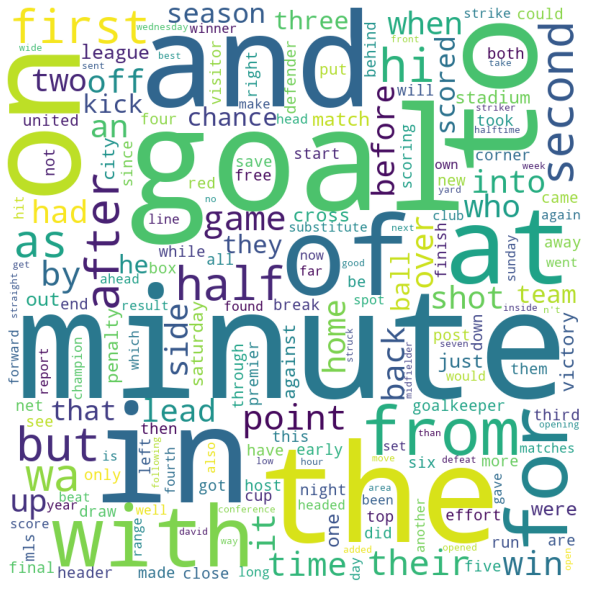

In [136]:
plot_wordcloud(vocab)

Eventos:

In [146]:
%%time
events_vocab = processor.get_vocabulary(text_type='events')

CPU times: user 3.36 ms, sys: 0 ns, total: 3.36 ms
Wall time: 2.97 ms


In [147]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in events_vocab])

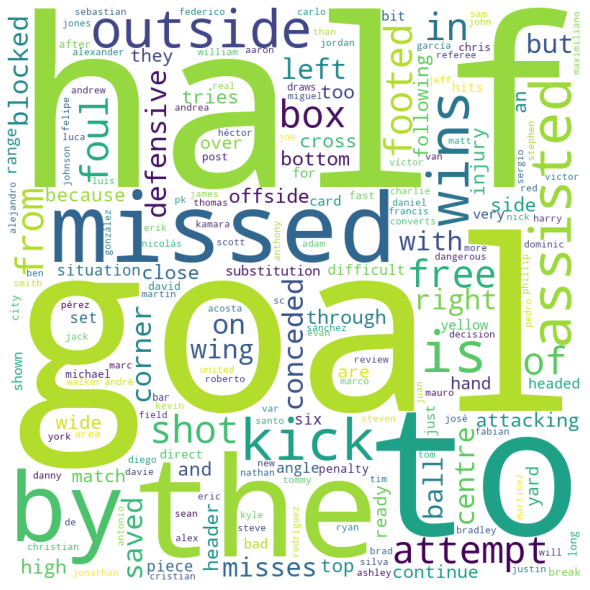

In [148]:
plot_wordcloud(vocab)

__Quitando stopwords y lematizando__

In [149]:
processor = ArticleTextProcessor(lemma=True)

In [105]:
%%time
article_vocab = processor.get_vocabulary(text_type='article', process=True)

CPU times: user 4.02 ms, sys: 0 ns, total: 4.02 ms
Wall time: 3.56 ms


In [106]:
article_vocab[:20]

[('minute', 3824),
 ('goal', 3711),
 ('half', 3082),
 ('second', 2920),
 ('win', 2804),
 ('score', 2603),
 ('lead', 2451),
 ('point', 2427),
 ('time', 2380),
 ('game', 2201),
 ('match', 2184),
 ('home', 2113),
 ('season', 1970),
 ('shot', 1831),
 ('ball', 1763),
 ('kick', 1761),
 ('league', 1755),
 ('cross', 1686),
 ('victory', 1624),
 ('head', 1594)]

In [108]:
len(article_vocab)

14948

In [113]:
vocab = '. '.join(['. '.join(t[0] for i in range(t[1])) for t in article_vocab])

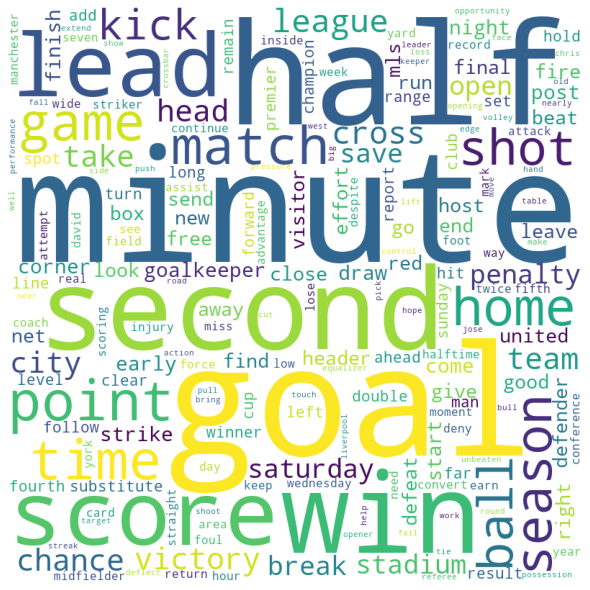

In [123]:
plot_wordcloud(vocab)

In [150]:
%%time
events_vocab = processor.get_vocabulary(text_type='events', process=True)

CPU times: user 2.81 ms, sys: 0 ns, total: 2.81 ms
Wall time: 2.51 ms


In [151]:
events_vocab[:20]

[('goal', 4364),
 ('half', 4364),
 ('miss', 4359),
 ('kick', 4355),
 ('assist', 4355),
 ('outside', 4355),
 ('attempt', 4355),
 ('free', 4355),
 ('box', 4355),
 ('shot', 4355),
 ('footed', 4355),
 ('win', 4355),
 ('foul', 4355),
 ('right', 4354),
 ('defensive', 4353),
 ('concede', 4353),
 ('corner', 4353),
 ('left', 4353),
 ('centre', 4351),
 ('save', 4345)]

In [154]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in events_vocab])

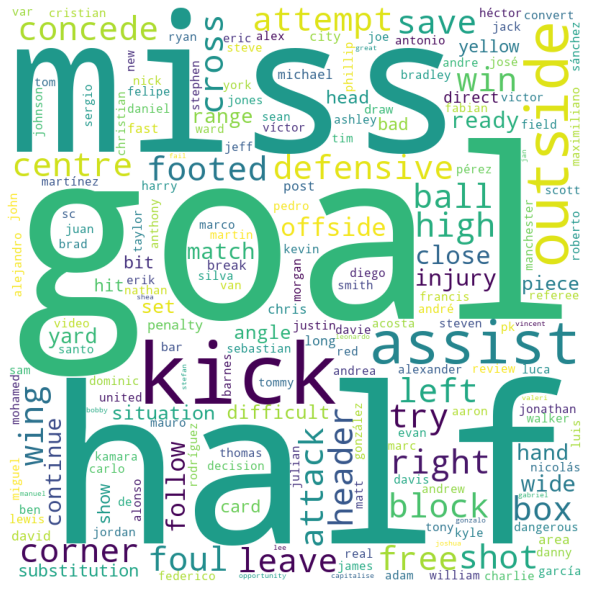

In [155]:
plot_wordcloud(vocab)

## Procesamiento de entidades nombradas

Podemos identificar los distintos equipos y jugadores utilizando los eventos.

In [6]:
processor = ArticleTextProcessor()

In [7]:
all_files = processor.load_json()

In [11]:
tp = TeamPlayers()

In [ ]:
%%time
tp.run(all_files)

premier_league_2018_2019.json


In [144]:
tp.teams_players_dict

{'Arsenal': {'Ainsley Maitland-Niles',
  'Alexandre Lacazette',
  'Bukayo Saka',
  'Calum Chambers',
  'Dani Ceballos',
  'David Luiz',
  'Eddie Nketiah',
  'Gabriel Martinelli',
  'Granit Xhaka',
  'Joe Willock',
  'Joseph Willock',
  'Kieran Tierney',
  'Matteo Guendouzi',
  'Mesut Özil',
  'Nelson',
  'Nicolas Pépé',
  'Pierre-Emerick Aubameyang',
  'Reiss Nelson',
  'Sead Kolasinac',
  'Shkodran Mustafi'},
 'Manchester United': {'Aaron Wan-Bissaka',
  'Andreas Pereira',
  'Angel Gomes',
  'Anthony Martial',
  'Ashley Young',
  'Axel Tuanzebe',
  'Brandon Williams',
  'Bruno Fernandes',
  'Chong',
  'Daniel James',
  'David de Gea',
  'Fred',
  'Harry Maguire',
  'Jesse Lingard',
  'Juan Mata',
  'Luke Shaw',
  'Marcos Rojo',
  'Marcus Rashford',
  'Mason Greenwood',
  'Paul Pogba',
  'Phil Jones',
  'Scott McTominay',
  'Victor Lindelöf'},
 'Norwich City': {'Adam Idah',
  'Alexander Tettey',
  'Ben Godfrey',
  'Bernd Leno',
  'Christoph Zimmermann',
  'Dennis Srbeny',
  'Emiliano B

In [148]:
tp.players_teams_dict

{'Matteo Guendouzi': 'Arsenal',
 'Pierre-Emerick Aubameyang': 'Arsenal',
 'Nicolas Pépé': 'Arsenal',
 'Marcus Rashford': 'Manchester United',
 'David Luiz': 'Arsenal',
 'Harry Maguire': 'Manchester United',
 'Mason Greenwood': 'Manchester United',
 'Jesse Lingard': 'Manchester United',
 'Calum Chambers': 'Arsenal',
 'Scott McTominay': 'Manchester United',
 'Daniel James': 'Manchester United',
 'Joe Willock': 'Arsenal',
 'Bukayo Saka': 'Arsenal',
 'Dani Ceballos': 'Arsenal',
 'Axel Tuanzebe': 'Manchester United',
 'Granit Xhaka': 'Arsenal',
 'Sead Kolasinac': 'Arsenal',
 'Bernd Leno': 'Norwich City',
 'Victor Lindelöf': 'Manchester United',
 'Paul Pogba': 'Manchester United',
 'Ashley Young': 'Manchester United',
 'David de Gea': 'Manchester United',
 'Andreas Pereira': 'Manchester United',
 'Nelson': 'Arsenal',
 'Fred': 'Manchester United',
 'Yoshinori Muto': 'Newcastle United',
 'Wilfred Ndidi': 'Leicester City',
 'Paul Dummett': 'Newcastle United',
 'Fabian Schär': 'Newcastle United'

In [7]:
tp = TeamPlayers()

In [7]:
%%time
tp.run_file('mls_2016_2017.json')

https://matchcenter.mlssoccer.com/matchcenter/2016-09-02-st-vincent-and-the-grenadines-vs-us-mens-national-team/feed
set()
['Lineups are announced and players are warming up.', 'First Half begins.', 'Attempt blocked. Alejandro Bedoya (USA) left footed shot from outside the box is blocked. Assisted by Graham Zusi.', 'Corner,  USA. Conceded by Shawn Benjamin.', 'Attempt saved. Bobby Wood (USA) left footed shot from the centre of the box is saved in the bottom right corner. Assisted by Fabian Johnson.', 'Offside, St. Vincent and the Grenadines. Cornelius Stewart tries a through ball, but Oalex Anderson is caught offside.', 'Jozy Altidore (USA) wins a free kick in the attacking half.', 'Foul by Theon Gordon (St. Vincent and the Grenadines).', 'Corner,  USA. Conceded by Ajure Durham.', 'Ajure Durham (St. Vincent and the Grenadines) wins a free kick in the defensive half.', 'Foul by Jozy Altidore (USA).', 'Emrald George (St. Vincent and the Grenadines).', 'DeAndre Yedlin (USA) wins a free ki

In [8]:
%%time
tp.run_file('mls_2015_2016.json')

https://matchcenter.mlssoccer.com/matchcenter/2015-06-16-chicago-fire-vs-louisville-city/feed
{'Louisville City'}
['Lineups are announced and players are warming up.', 'First Half begins.', 'First Half ends, Chicago Fire 0, Louisville City FC 0.', 'Second Half begins Chicago Fire 0, Louisville City FC 0.', 'Second Half ends, Chicago Fire 0, Louisville City FC 0.', 'First Half Extra Time begins Chicago Fire 0, Louisville City FC 0.', 'First Half Extra Time ends, Chicago Fire 0, Louisville City FC 0.', 'Second Half Extra Time begins Chicago Fire 0, Louisville City FC 0.', 'Second Half Extra Time ends, Chicago Fire 1, Louisville City FC 0.', 'Match ends, Chicago Fire 1, Louisville City FC 0.']
[[('First', 'ORDINAL'), ('Half', 'CARDINAL')], [('First', 'ORDINAL'), ('Half', 'CARDINAL'), ('Chicago', 'GPE'), ('Louisville City', 'GPE')], [('Second', 'ORDINAL'), ('Half', 'CARDINAL'), ('Chicago', 'GPE'), ('Louisville City', 'GPE')], [('Second', 'ORDINAL'), ('Half', 'CARDINAL'), ('Chicago', 'GPE')

In [9]:
len(tp.teams_players_dict)

34

In [10]:
tp.teams_players_dict

{'New York Red Bulls': {'Aaron Long',
  'Alejandro Romero Gamarra',
  'Alex Muyl',
  'Andreas Ivan',
  'Antonio Mlinar Delamea',
  'Aurélien Collin',
  'Bradley Wright-Phillips',
  'Brian White',
  'Carlos Rivas',
  'Connor Lade',
  'Cristian Cásseres Jr',
  'Damien Perrinelle',
  'Daniel Royer',
  'Derrick Etienne',
  'Ethan Kutler',
  'Fidel Escobar',
  'Gonzalo Verón',
  'Hassan Ndam',
  'Jean Picault',
  'Kemar Lawrence',
  'Kyle Duncan',
  'Lade',
  'Luis Robles',
  'Marc Rzatkowski',
  'Matt Lampson',
  'Michael Murillo',
  'Rodolfo Cota',
  'Ryan Meara',
  'Sean Davis',
  'Tim Parker',
  'Tyler Adams',
  'Vincent Bezecourt'},
 'Toronto': {'Ager Aketxe',
  'Agustín Marchesín',
  'Alexander Bono',
  'Armando Cooper',
  'Ashtone Morgan',
  'Auro',
  'Ayo Akinola',
  'Ben Spencer',
  'Brad Stuver',
  'Chris Mavinga',
  'Drew Moor',
  'Gregory Van der Wiel',
  'Gregory van der Wiel',
  'Guido Rodríguez',
  'Jason Hernandez',
  'Jay Chapman',
  'Jon Bakero',
  'Jonathan Osorio',
  'Jo

Debug

In [55]:
url = 'http://www.premierleague.com/match/22447'
season_file = 'premier_league_2017_2018.json'
season_dict = tp.all_files[season_file]
article_events_dict = season_dict[url]

In [59]:
article_events_dict

{'article': "Substitute Sam Vokes was the hero for Burnley as they came away from St Mary's Stadium with a 1-0 win that sent them sixth in the table.\nAfter a first half where both sides threatened but failed to find a breakthrough, Burnley manager Sean Dyche turned to Vokes in search of a winner midway through the second half.\nAnd his move paid off in the 81st minute as Vokes headed a Johann Berg Gudmunsson cross past Fraser Forster into the bottom-right corner of the goal.\nThe result drops Southampton to 13th with 13 points.\nSee: Southampton report | Burnley report",
 'events': []}

In [56]:
en_events_text = tp.atp.entity_names_events(article_events_dict['events'])
en_events_proc = tp.teams_players_sets(en_events_text, season_file.split('.')[0])

In [57]:
en_events_proc

[]

In [58]:
en_events_text

[]